## Introduction

In the beginning, our team considered tourists and students for the domain of the best neighborhood in Pittsburgh at the start of the project and found data sets to help complete the analysis. However, changing the domain to senior citizens to find the best neighborhood for them. The team chose such a metric because it is essential for seniors to live in a safe and healthy environment. After all, they are the most vulnerable group in society. We decided on the health metric by making a list of seven possible metrics and included datasets that we found interesting that we could use for a specific metric. The most important things that we considered were healthcare availability and street and general neighborhood safety. This analysis attempts to find **the safest neighborhood in Pittsburgh for senior citizens**.

## Metric 1

I was looking at how senior citizens have mobility issues and are susceptible to getting hurt on their walks. Based on the reports, I decided to use 311 data to find the best neighborhood. First, I thought to look at the lowest neighborhood with reports.

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas 

In [3]:
# Brining in data file
df = pd.read_csv('311.csv')

In [4]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


Displaying the dataset the colomns names look good and no need to rename them.

In [5]:
#Rows and columns
df.shape

(606470, 17)

In [6]:
#Displaying the neighborhood
df.NEIGHBORHOOD.unique()

array(['Central Northside', 'South Side Flats', 'Troy Hill', 'Banksville',
       'East Hills', 'Mount Washington', 'Bluff', 'Middle Hill',
       'North Oakland', 'Central Business District',
       'Spring Hill-City View', 'Brighton Heights', 'Marshall-Shadeland',
       nan, 'Lower Lawrenceville', 'Windgap', 'Brookline', 'Beechview',
       'Perry North', 'Carrick', 'East Allegheny', 'Bloomfield',
       'Sheraden', 'Manchester', 'Larimer', 'Upper Hill', 'Point Breeze',
       'Lincoln-Lemington-Belmar', 'Knoxville', 'Morningside', 'Fineview',
       'Central Lawrenceville', 'Squirrel Hill South',
       'South Side Slopes', 'Overbrook', 'South Oakland', 'North Shore',
       'Garfield', 'California-Kirkbride', 'Crawford-Roberts',
       'Perry South', 'Point Breeze North', 'Elliott', 'Homewood West',
       'Spring Garden', 'Allentown', 'Summer Hill', 'Hazelwood',
       'Squirrel Hill North', 'Allegheny Center', 'Westwood',
       'Strip District', 'Regent Square', 'Stanton Height

In [7]:
# Number of neighborhood
len(df.NEIGHBORHOOD.unique())

92

After analyzing the data, I decided to choose only the columns that will help determine the best neighborhood, which I will use to make it easier and faster. 

In [8]:
#New dataframe 'df1' only two columns
df1 = df[['REQUEST_TYPE', 'NEIGHBORHOOD']]

In [9]:
#Grouping by neighborhoods and counting the number of requests for each neighborhood.
numOfReport = df1.groupby("NEIGHBORHOOD" , as_index = False).agg({'REQUEST_TYPE': 'count'}).sort_values('REQUEST_TYPE', ascending=True)

In [10]:
numOfReport

,NEIGHBORHOOD,REQUEST_TYPE
52,Mount Oliver Borough,61
4,Arlington Heights,128
35,Glen Hazel,394
26,East Carnegie,571
58,Northview Heights,576
...,...,...
72,South Side Flats,18083
73,South Side Slopes,19626
77,Squirrel Hill South,20255
15,Carrick,23575


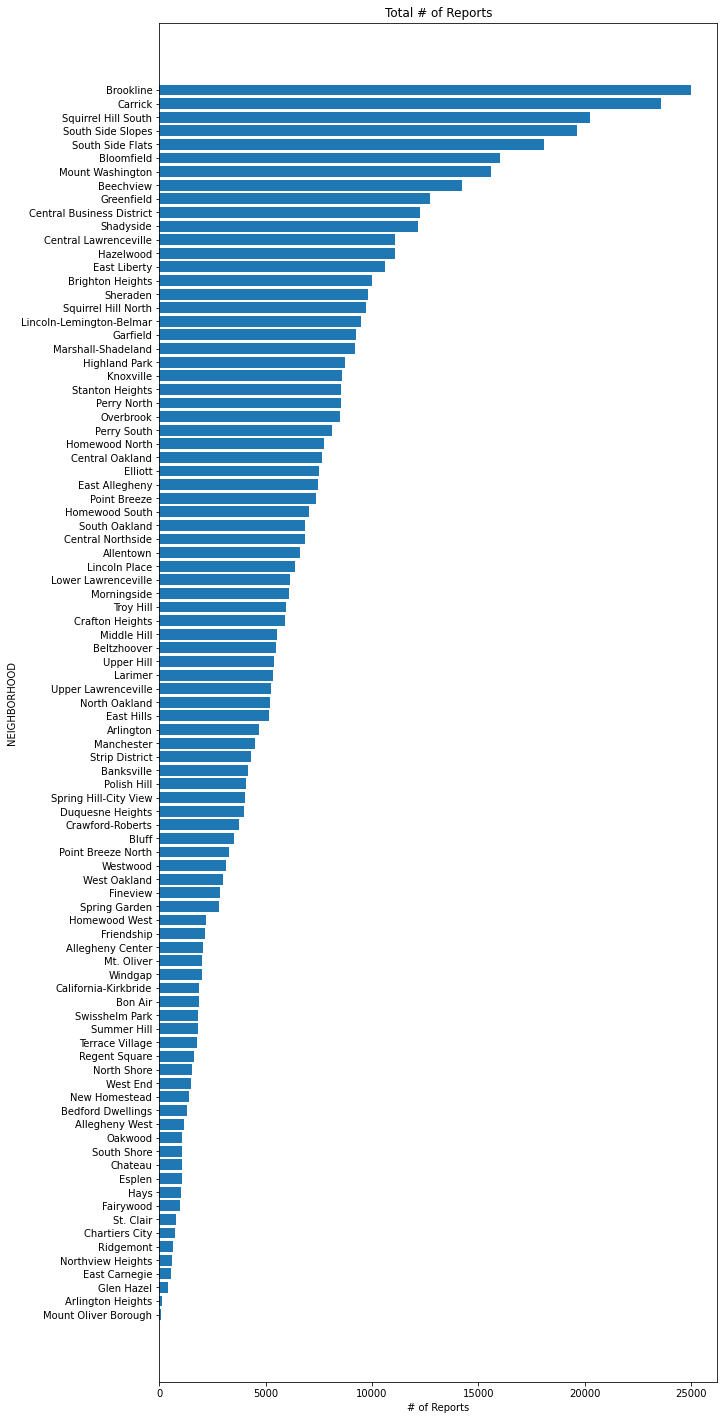

In [11]:
y_axis = numOfReport['NEIGHBORHOOD']
x_axis = numOfReport['REQUEST_TYPE']

plt.figure(figsize=(10,25))
plt.barh(y_axis,x_axis)
plt.title('Total # of Reports')
plt.ylabel('NEIGHBORHOOD')
plt.xlabel('# of Reports')
plt.show()

After analyzing the data I decided to narrow it down to only look at reports the contain the term **sidewalk** because it is related in answering the threats to mobilty of senior citizents.

In [12]:
#Changing colm "REQUEST_TYPE" to all lower for unite the format
df1["REQUEST_TYPE"] = df1["REQUEST_TYPE"].str.lower()

<ipython-input-12-4a76b1733315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["REQUEST_TYPE"] = df1["REQUEST_TYPE"].str.lower()


In [13]:
# New Dataframe that only holds reports with word sidewalk
df2 = df1.query('REQUEST_TYPE.str.startswith("sidewalk")')

In [14]:
df2

,REQUEST_TYPE,NEIGHBORHOOD
6,sidewalk/curb/hc ramp maintenance,Mount Washington
20,sidewalk/curb/hc ramp maintenance,Perry North
23,sidewalk obstruction,Central Business District
335,sidewalk/curb/hc ramp maintenance,Central Business District
472,sidewalk/curb/hc ramp maintenance,South Side Flats
...,...,...
604949,sidewalk has ice or litter,Elliott
604950,sidewalk/curb/ada ramp maintenance,Banksville
605479,sidewalk has ice or litter,Mount Washington
605957,sidewalk/curb/ada ramp maintenance,Central Business District


In [15]:
#Grouping by neighborhoods and counting the number of requests for each neighborhood.
numOfReport = df2.groupby("NEIGHBORHOOD" , as_index = False).agg({'REQUEST_TYPE': 'count'}).sort_values('REQUEST_TYPE', ascending=False)

In [16]:
numOfReport

,NEIGHBORHOOD,REQUEST_TYPE
75,Squirrel Hill South,416
74,Squirrel Hill North,334
16,Central Business District,327
66,Shadyside,311
13,Brookline,301
...,...,...
29,Fairywood,3
33,Glen Hazel,2
79,Summer Hill,2
50,Mount Oliver Borough,2


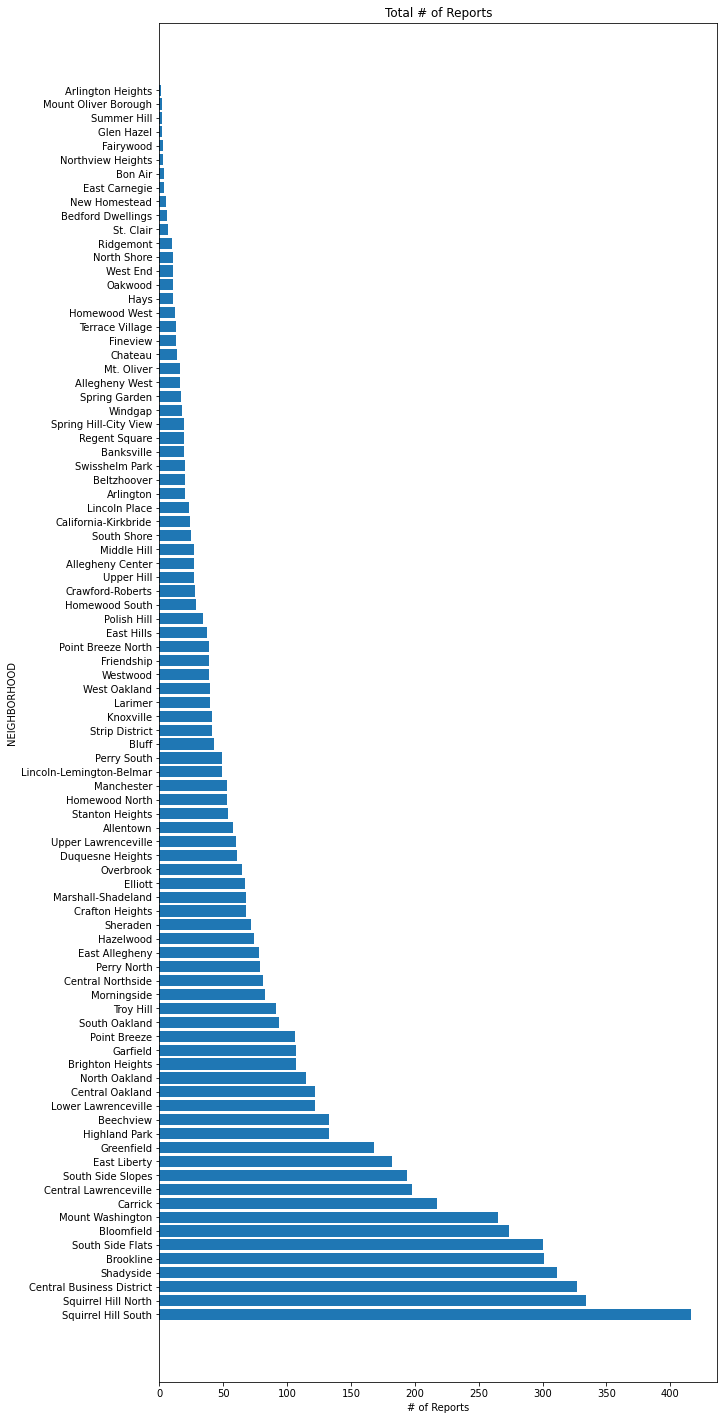

In [17]:
y_axis = numOfReport['NEIGHBORHOOD']
x_axis = numOfReport['REQUEST_TYPE']

plt.figure(figsize=(10,25))
plt.barh(y_axis,x_axis)
plt.title('Total # of Reports')
plt.ylabel('NEIGHBORHOOD')
plt.xlabel('# of Reports')
plt.show()

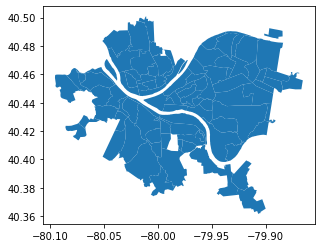

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [19]:
# do the merge
sidewalk_reports = neighborhoods.merge(numOfReport , how='left', left_on='hood', right_on='NEIGHBORHOOD')
# look at the head to confirm it merged correctly
sidewalk_reports[['hood','REQUEST_TYPE','geometry']].head()

,hood,REQUEST_TYPE,geometry
0,Chateau,14.0,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,2.0,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,3.0,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,19.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,49.0,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."


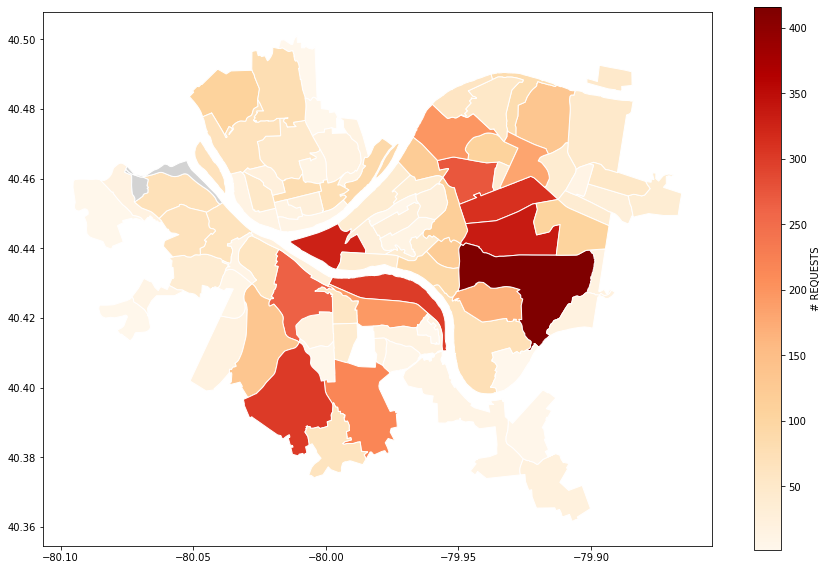

In [20]:
sidewalk_reports.plot(column='REQUEST_TYPE', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "# REQUESTS"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Metric 1 Conclusion:

After Further inspecting the charts and heat maps, I decided that the neighborhood with the most requests would receive the highest rank in terms of the best neighborhood for seniors. The reason is that the more requests mean the neighborhood is active with 311 reports which means the likelihood of attending the sidewalks is higher in the neighborhood that does not report anything to the city.
    

In [21]:
#Ranking neighborhoods
count = dict() # dictionary
i = 1 # start from to prevent counting from zero

for key in df2['NEIGHBORHOOD']: # another for loop to keep count of the same words
    if key not in count: # check if word is in dictionary
        count[key] = 1
    else:
        count[key] += 1  # case word already exsits then increment   

for key in count: # iterate through dictionary and print words with counts
    print(key, count[key])        



Mount Washington 265
Perry North 79
Central Business District 327
South Side Flats 300
Marshall-Shadeland 68
Troy Hill 91
South Side Slopes 194
Strip District 41
Brookline 301
Brighton Heights 107
North Oakland 115
Central Oakland 122
Bloomfield 274
Beechview 133
Garfield 107
Fineview 13
Larimer 40
Squirrel Hill South 416
East Allegheny 78
Manchester 53
West Oakland 40
Crafton Heights 68
Elliott 67
Central Northside 81
Duquesne Heights 61
South Shore 25
Perry South 49
Homewood North 53
Banksville 19
Westwood 39
Windgap 18
Highland Park 133
Hazelwood 74
Squirrel Hill North 334
Upper Hill 27
Carrick 217
Hays 11
Sheraden 72
Morningside 83
East Liberty 182
Northview Heights 3
Fairywood 3
Spring Hill-City View 19
North Shore 11
Lower Lawrenceville 122
Bedford Dwellings 6
Point Breeze 106
Central Lawrenceville 198
Polish Hill 34
Spring Garden 17
Bluff 43
East Carnegie 4
Crawford-Roberts 28
Chateau 14
Stanton Heights 54
Point Breeze North 39
Lincoln Place 23
South Oakland 94
nan 126
Lincoln-L

In [22]:
df3 = pd.DataFrame(list(count.items()),columns = ['NEIGHBORHOOD','NUM_REPORT'])

In [23]:
df3 = df3.sort_values('NUM_REPORT' ,ascending=False)

In [24]:
count = 1 
for index in df3.index:
    df3.loc[index, 'RANK'] = count  
    count += 1

In [26]:
df3

,NEIGHBORHOOD,NUM_REPORT,RANK
17,Squirrel Hill South,416,1.0
33,Squirrel Hill North,334,2.0
2,Central Business District,327,3.0
64,Shadyside,311,4.0
8,Brookline,301,5.0
...,...,...,...
40,Northview Heights,3,86.0
84,Glen Hazel,2,87.0
85,Mount Oliver Borough,2,88.0
89,Summer Hill,2,89.0
